### Importing Libraries and packages to be used in creating ML model to manage and understand the demand of bike market

In [168]:
# First import of basic data manululation and visualization libraries
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignoring warnings if any
import warnings
warnings.filterwarnings(action = 'ignore')

# using sklear library to split the data in trains and test datasets
from sklearn.model_selection import train_test_split
# Importing min_max scaler to scale the data sets
from sklearn.preprocessing import MinMaxScaler
#  importing RFE and LinearRegression from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Importing statsmodel library
import statsmodels.api as sm
#importing variance_inflation_factor(VIF) function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing R-square function from sklearn
from sklearn.metrics import r2_score



## Step 1: Data understading and manupulation(data cleanup) if any

In [169]:
# reading data set 
df_bikes = pd.read_csv('day.csv')
df_bikes_1 = pd.read_csv('day.csv')
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [170]:
df_bikes.shape

(730, 16)

In [171]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [172]:
# Checking for duplicates
print(df_bikes.shape)
print(df_bikes.drop_duplicates().shape)


(730, 16)
(730, 16)


#### After going through the data and data dictionary here are my findings:
* There are some categorical columns like **season**, **mnth**, **weekday**, **weatersit** which had int values which needs to be converted during the data cleanup progress
* There are some columns like **instant**, **dteday**, **casual**, **registered** that can be dropped
* `No null values` are there
* `No duplicates` are there 

### Dropping Unnecessary columns as they will not help in my analysis


In [173]:
useless_cols = ['instant', 'dteday', 'casual', 'registered']
df_bikes = df_bikes.drop(useless_cols,axis=1)
df_bikes_1 = df_bikes_1.drop(useless_cols,axis=1)

In [174]:
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data conversion

In [175]:
# Mapping the seasons name based on data dictionary - (1:spring, 2:summer, 3:fall, 4:winter)
# Creating new dataframe were string values will be available
df_bikes_1[['season']] = df_bikes_1[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))


In [176]:
# Mapping the month name based on data dictionary - (1:jan, 2:feb, 3:mar, 4:apr....)
df_bikes_1['mnth'] = df_bikes_1['mnth'].apply(lambda x: calendar.month_name[x])

In [177]:
# Mapping the weekdays  name based on data dictionary - (1:mon, 2:tue, 3:wed, 4:thu....)
df_bikes_1['weekday'] = df_bikes_1['weekday'].apply(lambda x : calendar.day_name[x])


In [178]:
#mapping the weathersit name with numbners 1:clear,2:mist & cloudy,3:light snow & rain,4:'heavy rain & ice pallets'
df_bikes_1[['weathersit']] = df_bikes_1[['weathersit']].apply(lambda x : x.map({1:'clear',2:'Mist & Cloudy',3:'Light Snow',4:'Heavy Rain'}))

In [179]:
# Checking the dataframe
df_bikes_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Sunday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Monday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2- Visualizing the data for numeric features

In [180]:
# We will be using matplot and seaborn to visualize the data

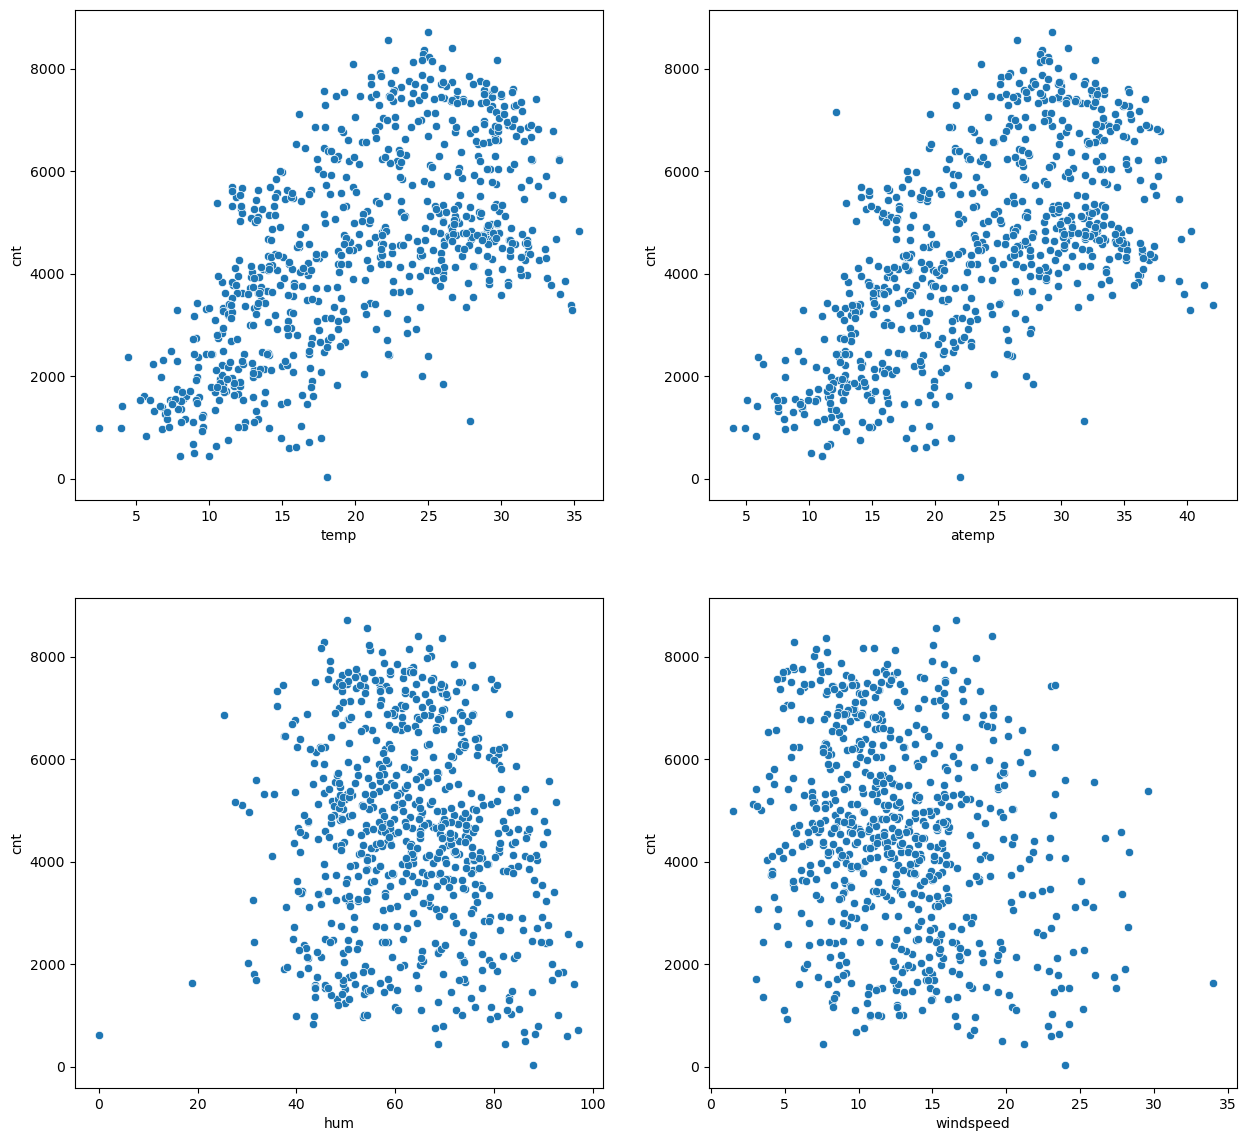

In [181]:

plt.figure(figsize=(15,14))
plt.subplot(2,2,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = df_bikes_1)
plt.subplot(2,2,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = df_bikes_1)
plt.subplot(2,2,3)
sns.scatterplot(x = 'hum', y = 'cnt', data = df_bikes_1)
plt.subplot(2,2,4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = df_bikes_1)
plt.show()

### Points on above scatterplot for numerical values
1. cnt is correlated with temperature and feels like temperature
2. cnt is not correlated with humidity and windspeed 

### Visualizing data for categorical features

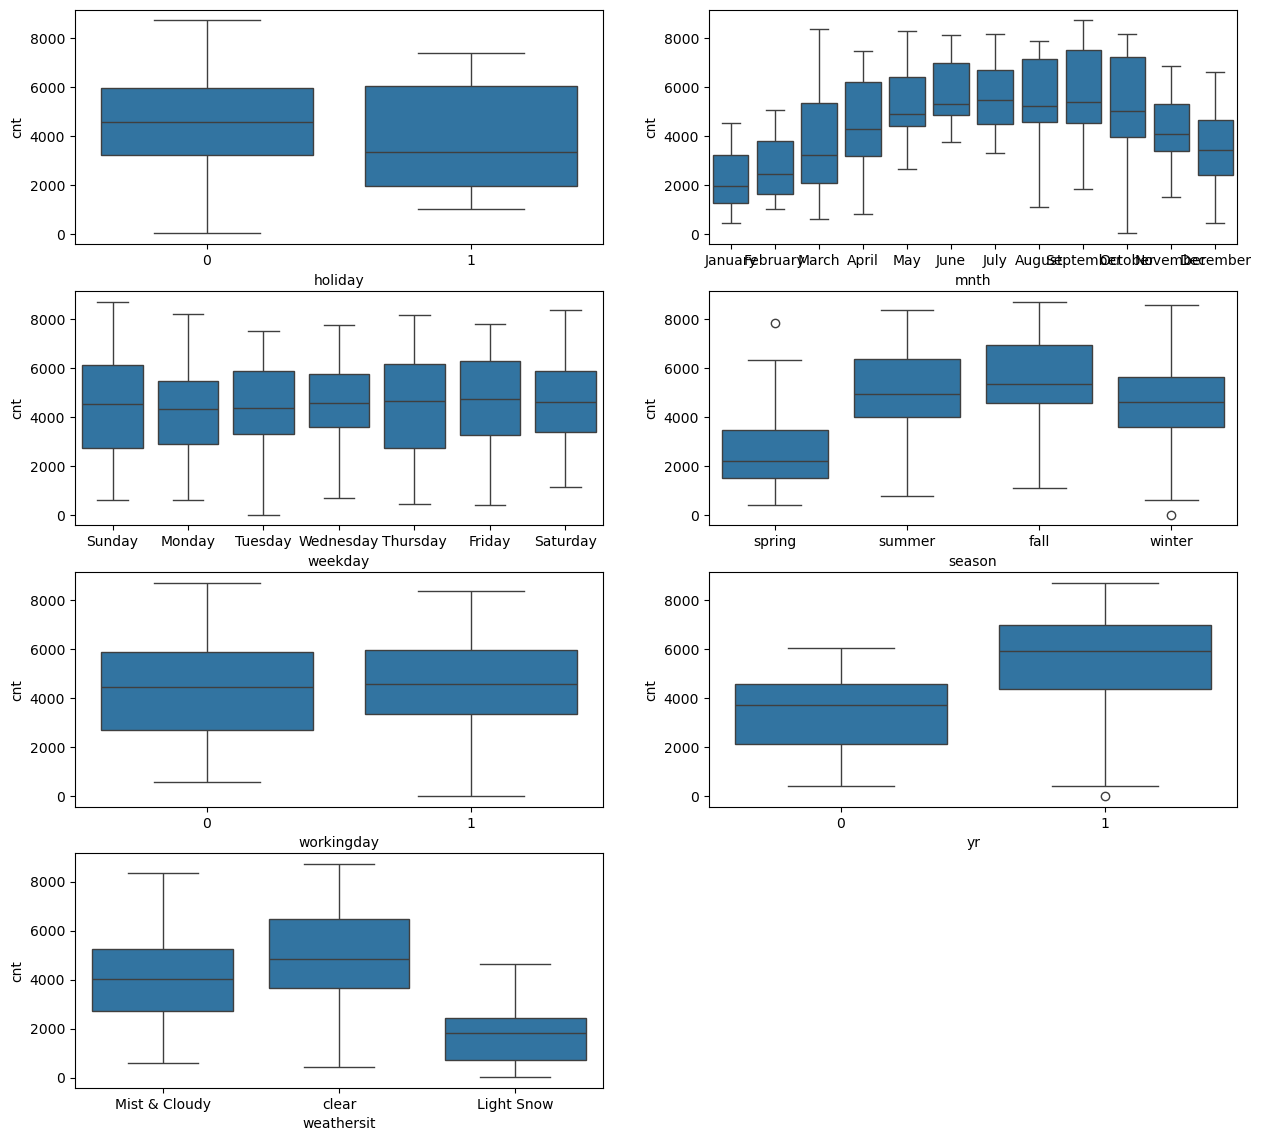

In [182]:
plt.figure(figsize=(15, 14))
plt.subplot(4,2,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bikes_1)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bikes_1)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bikes_1)
plt.subplot(4,2,4)
sns.boxplot(x = 'season', y = 'cnt', data = df_bikes_1)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bikes_1)
plt.subplot(4,2,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikes_1)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bikes_1)

plt.show()


### Points on above scatterplot for categorical fields
1. On Holidays less bikes are books as compared to a no holiday day
2. There is an increase in bike booking from March till October
3. There is slight variation in bikes getting booked on weekdays
4. In spring season bikes books are getting dropped as compared to other seasons
5. There is slight variation is bike bookings done on workingdays. but there seems to be no relation here
6. There are more bikes getting booked in 2019 than in 2018
7. Bike bookings are more in the month clear,  mist or cloudy weathers


### Finding co-relation among all the features  

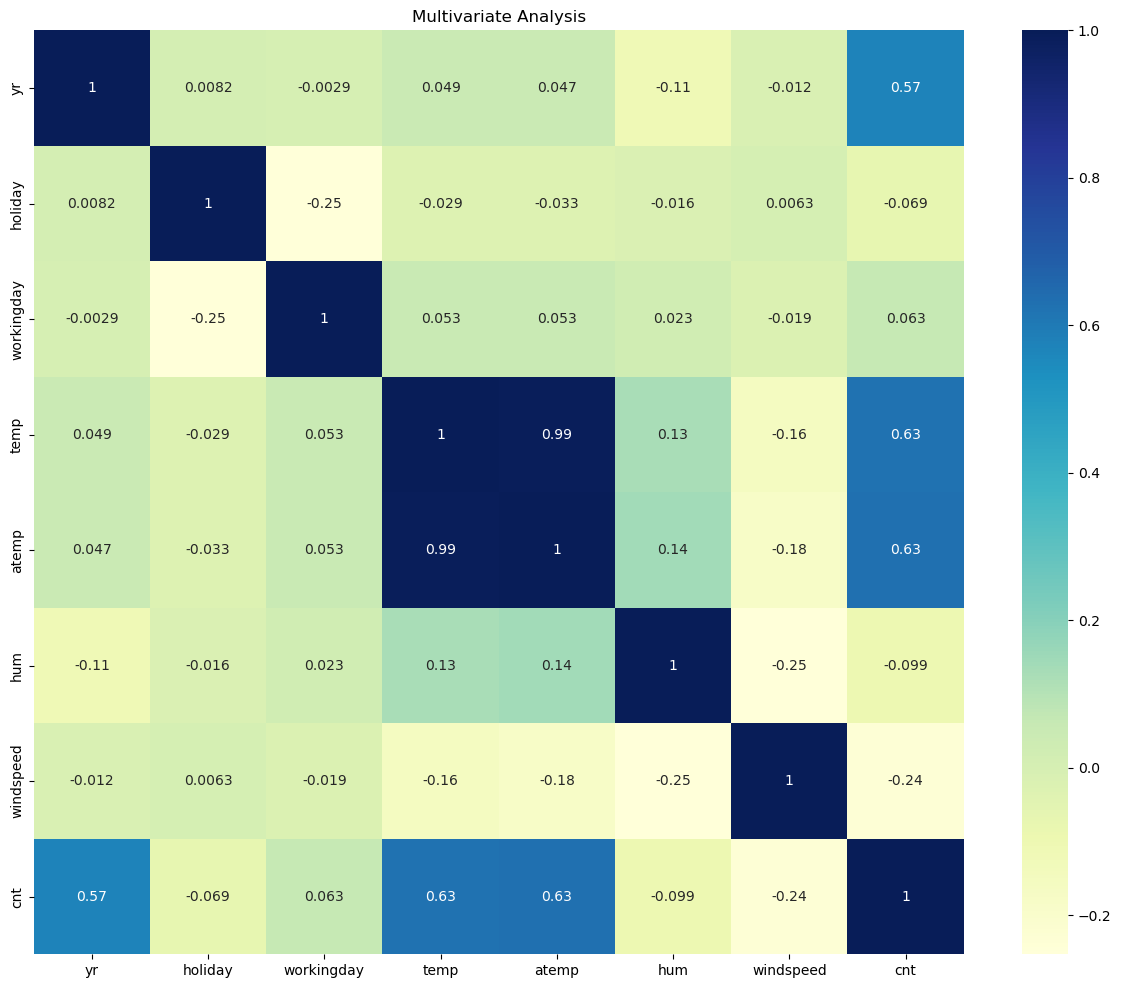

In [183]:
plt.figure(figsize = (15, 12))

selected_cols = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.heatmap(df_bikes[selected_cols].corr(numeric_only = True), annot = True, cmap = 'YlGnBu')

plt.title("Multivariate Analysis")
plt.show()

### Points on above headmap
1. From the correlations temp and atemp features looks very much correlated, so one od them can be dropped(Multicollinearity case)
2. Windspeed is negativvely correlated with cnt
3. cnt is highly correlated with yr, temp, and atemp

In [184]:
# Droping atemp column
df_bikes = df_bikes.drop(["atemp"], axis=1)
df_bikes_1 = df_bikes_1.drop(["atemp"], axis=1)

## Step 5 - Data Preperation
### Adding dummy variables
#### Variable like `season`, `mnth`, `weekday`, `weathersit` has multiple levels.

#### Creating dummy variable for feature season


In [185]:
dummy_season = pd.get_dummies(df_bikes_1.season, dtype=int)

In [186]:
dummy_season.head()
# We dont need all column below, we can drop one column

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [187]:
dummy_season = pd.get_dummies(df_bikes_1.season, dtype=int, drop_first = True)


In [188]:
dummy_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Create  dummy variable for feature mnth

In [189]:
dummy_mnth = pd.get_dummies(df_bikes_1.mnth, dtype=int)

In [190]:
dummy_mnth.head()
# We dont need all column below, we can drop one column

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


### combinations that we will have for mnth
* 10000000000
* 01000000000
* 00100000000
* 00010000000
* 00001000000
* 00000100000
* 00000010000
* 00000001000
* 00000000100
* 00000000010
* 00000000001

In [191]:
dummy_mnth = pd.get_dummies(df_bikes_1.mnth, dtype=int, drop_first = True)


In [192]:
dummy_mnth

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


#### Create  dummy variable for feature weekday

In [193]:
dummy_weekday = pd.get_dummies(df_bikes_1.weekday, dtype=int)

In [194]:
dummy_weekday.head()
# We dont need all column below, we can drop one column

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


### combinations that we will have for mnth
* 100000
* 010000
* 001000
* 000100
* 000010
* 000001

In [195]:
dummy_weekday = pd.get_dummies(df_bikes_1.weekday, dtype=int, drop_first = True)


In [196]:
dummy_weekday

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


#### Create  dummy variable for feature weathersit

In [197]:
dummy_weathersit = pd.get_dummies(df_bikes_1.weathersit, dtype=int)

In [198]:
dummy_weathersit.head()
# We dont need all column below, we can drop one column

,Light Snow,Mist & Cloudy,clear
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


### combinations that we will have for Heavy Rain
* 100
* 010
* 001

In [199]:
dummy_weathersit = pd.get_dummies(df_bikes_1.weathersit, dtype=int, drop_first = True)


In [200]:
dummy_weathersit.head()  

,Mist & Cloudy,clear
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [201]:
# combaning all the dummy values to main data frame df_bikes

In [202]:
df_bikes = pd.concat([df_bikes, dummy_mnth, dummy_season, dummy_weathersit, dummy_weekday], axis = 1)

In [203]:
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,summer,winter,Mist & Cloudy,clear,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,1,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,...,0,0,1,0,1,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,0,1,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,0,0,1
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,...,0,0,0,1,0,0,0,1,0,0


In [204]:
# Lets drop the extra columns used to create dummy column

df_bikes = df_bikes.drop(['season' , 'mnth' , 'weekday' , 'weathersit'], axis = 1)


In [205]:
df_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,summer,winter,Mist & Cloudy,clear,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [206]:
# Lets same this data set as csv just for a checkpoint purpose.
df_bikes.to_csv("bikes_2.csv", index=False)

In [266]:
df_bikes = pd.read_csv("bikes_2.csv")

## Step 5- Data split into test and traing 

In [267]:
df_bike_train, df_bikes_test  = train_test_split(df_bikes, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the datasets
#### As we know there are two ways of rescaling
 1. Min-Max scaling
 2. Standardisation 



In [268]:
# This time we will be using Min-max scaling 
min_max_scaler_object = MinMaxScaler()

In [269]:
scale_down_vars = ['temp', 'hum', 'windspeed', 'cnt' ]
df_bike_train[scale_down_vars] = min_max_scaler_object.fit_transform(df_bike_train[scale_down_vars])

In [270]:
df_bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,summer,winter,Mist & Cloudy,clear,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,1,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,1,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [271]:
df_bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,summer,winter,Mist & Cloudy,clear,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.245098,0.24902,0.343137,0.627451,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.430568,0.43287,0.475223,0.483958,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## step 6 - Building a linear Model
#### In Mode building process we will using RFE method to eliminate the features

In [272]:
# Spliting the train data set in X and y
y_train = df_bike_train.pop('cnt')
X_train = df_bike_train

In [273]:
# Initializing the Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step=15).fit(X_train, y_train)

In [274]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 2),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 2),
 ('March', False, 2),
 ('May', False, 2),
 ('November', True, 1),
 ('October', False, 2),
 ('September', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Mist & Cloudy', True, 1),
 ('clear', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 2),
 ('Sunday', False, 2),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2)]

In [275]:
supported_cols = X_train.columns[rfe.support_]
unsupported_cols = X_train.columns[~rfe.support_]

In [276]:
# So these columns will be used in the model creation
supported_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'December', 'January',
       'July', 'November', 'September', 'spring', 'winter', 'Mist & Cloudy',
       'clear'],
      dtype='object')

In [277]:
# these columns are eliminated by RFE
unsupported_cols

Index(['workingday', 'August', 'February', 'June', 'March', 'May', 'October',
       'summer', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Building models using sm(Statsmodel)
### First Model

In [278]:
# Creating dataset using the supported column by RFE
X_train_rfe = X_train[supported_cols]

In [279]:
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)


In [280]:
# Model creation with fit
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [281]:
lr_1.params

const            0.112774
yr               0.231228
holiday         -0.090510
temp             0.434515
hum             -0.148644
windspeed       -0.180754
December        -0.045533
January         -0.050695
July            -0.072012
November        -0.049447
September        0.056819
spring          -0.100817
winter           0.073743
Mist & Cloudy    0.196343
clear            0.253763
dtype: float64

In [282]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          7.80e-189
Time:                        14:01:26   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1128      0.045      2.493      0.013       0.024       0.202
yr                0.2312      0.008     28.474      0.000       0.215       0.247
holiday          -0.0905      0.026     -3.517      0.000      -0.141      -0.040
temp              0.4345      0.033     13.169      0.000       0.370       0.499
hum              -0.1486      0.038     -3.936      0.000      -0.223      -0.074
windspeed        -0.1808      0.026     -7.015      0.000      -0.231      -0.130
December         -0.0455      0.017     -2.635      0.009      -0.079      -0.012
January          -0.0507      0.018     -2.810      0.005      -0.086      -0.015
July             -0.0720      0.017     -4.180      0.000      -0.106      -0.038
November         -0.0494      0.019     -2.664      0.008      -0.086      -0.013
September         0.0568      0.016      3.656      0.000       0.026       0.087
spring           -0.1008      0.015     -6.537      0.000      -0.131      -0.071
winter            0.0737      0.014      5.216      0.000       0.046       0.102
Mist & Cloudy     0.1963      0.025      7.829      0.000       0.147       0.246
clear             0.2538      0.026      9.588      0.000       0.202       0.306
==============================================================================
Omnibus:                       67.521   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.080
Skew:                          -0.665   Prob(JB):                     5.82e-39
Kurtosis:                       5.553   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [283]:
df_vif = pd.DataFrame()
df_vif['features'] = X_train_rfe.columns
df_vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
df_vif['VIF'] = round(df_vif['VIF'], 2)
df_vif = df_vif.sort_values(by='VIF', ascending=False)
df_vif


,features,VIF
3,hum,22.19
2,temp,21.35
13,clear,13.04
12,Mist & Cloudy,8.34
4,windspeed,4.30
10,spring,3.33
11,winter,3.02
0,yr,2.09
8,November,1.86
6,January,1.79


### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `December` as it has a very high p-val  of  f `0.009` Let's go ahead and drop this variable.e.

In [284]:
# Dropping varaible with very high p-value

X_train_rfe = X_train_rfe.drop('December', axis=1,)

### Second Model

In [285]:
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)


In [286]:
# Model creation with fit
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [287]:
lr_2.params

const            0.106467
yr               0.231129
holiday         -0.091607
temp             0.458181
hum             -0.156622
windspeed       -0.175470
January         -0.039536
July            -0.075935
November        -0.031186
September        0.059720
spring          -0.101159
winter           0.062239
Mist & Cloudy    0.191037
clear            0.246750
dtype: float64

In [288]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.67e-188
Time:                        14:13:08   Log-Likelihood:                 507.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1065      0.045      2.343      0.020       0.017       0.196
yr                0.2311      0.008     28.293      0.000       0.215       0.247
holiday          -0.0916      0.026     -3.538      0.000      -0.142      -0.041
temp              0.4582      0.032     14.345      0.000       0.395       0.521
hum              -0.1566      0.038     -4.136      0.000      -0.231      -0.082
windspeed        -0.1755      0.026     -6.790      0.000      -0.226      -0.125
January          -0.0395      0.018     -2.241      0.025      -0.074      -0.005
July             -0.0759      0.017     -4.398      0.000      -0.110      -0.042
November         -0.0312      0.017     -1.800      0.072      -0.065       0.003
September         0.0597      0.016      3.830      0.000       0.029       0.090
spring           -0.1012      0.016     -6.521      0.000      -0.132      -0.071
winter            0.0622      0.014      4.601      0.000       0.036       0.089
Mist & Cloudy     0.1910      0.025      7.597      0.000       0.142       0.240
clear             0.2467      0.026      9.315      0.000       0.195       0.299
==============================================================================
Omnibus:                       59.405   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.947
Skew:                          -0.607   Prob(JB):                     3.35e-32
Kurtosis:                       5.312   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [289]:
df_vif = pd.DataFrame()
df_vif['features'] = X_train_rfe.columns
df_vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
df_vif['VIF'] = round(df_vif['VIF'], 2)
df_vif = df_vif.sort_values(by='VIF', ascending=False)
df_vif


,features,VIF
3,hum,21.66
2,temp,19.81
12,clear,12.50
11,Mist & Cloudy,8.17
4,windspeed,4.29
9,spring,3.33
10,winter,2.71
0,yr,2.09
5,January,1.69
7,November,1.60


### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is `November`  as it has a very high p-value  of `0.072` . Let's go ahead and drop this variable.e.

In [290]:
# Dropping varaible with very high p-value

X_train_rfe = X_train_rfe.drop('November', axis=1,)

### Third Model

In [291]:
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)


In [292]:
# Model creation with fit
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [293]:
lr_3.params

const            0.101806
yr               0.231141
holiday         -0.097329
temp             0.464398
hum             -0.153789
windspeed       -0.176940
January         -0.038877
July            -0.076860
September        0.061767
spring          -0.098368
winter           0.052938
Mist & Cloudy    0.189976
clear            0.245554
dtype: float64

In [294]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.52e-189
Time:                        14:15:14   Log-Likelihood:                 505.89
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     497   BIC:                            -930.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1018      0.045      2.239      0.026       0.012       0.191
yr                0.2311      0.008     28.231      0.000       0.215       0.247
holiday          -0.0973      0.026     -3.780      0.000      -0.148      -0.047
temp              0.4644      0.032     14.592      0.000       0.402       0.527
hum              -0.1538      0.038     -4.055      0.000      -0.228      -0.079
windspeed        -0.1769      0.026     -6.835      0.000      -0.228      -0.126
January          -0.0389      0.018     -2.200      0.028      -0.074      -0.004
July             -0.0769      0.017     -4.443      0.000      -0.111      -0.043
September         0.0618      0.016      3.963      0.000       0.031       0.092
spring           -0.0984      0.015     -6.359      0.000      -0.129      -0.068
winter            0.0529      0.013      4.225      0.000       0.028       0.078
Mist & Cloudy     0.1900      0.025      7.540      0.000       0.140       0.239
clear             0.2456      0.027      9.252      0.000       0.193       0.298
==============================================================================
Omnibus:                       56.577   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.510
Skew:                          -0.585   Prob(JB):                     3.75e-30
Kurtosis:                       5.238   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [295]:
df_vif = pd.DataFrame()
df_vif['features'] = X_train_rfe.columns
df_vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
df_vif['VIF'] = round(df_vif['VIF'], 2)
df_vif = df_vif.sort_values(by='VIF', ascending=False)
df_vif


,features,VIF
3,hum,21.66
2,temp,19.63
11,clear,12.38
10,Mist & Cloudy,8.12
4,windspeed,4.27
8,spring,3.31
9,winter,2.27
0,yr,2.09
5,January,1.69
6,July,1.41


### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is,`January` as it has a very high p-value  of `0.028`. Let's go ahead and drop this variable.e.

In [296]:
# Dropping varaible with very high p-value

X_train_rfe = X_train_rfe.drop('January', axis=1,)

### Forth model

In [297]:
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)


In [298]:
# Model creation with fit
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [299]:
lr_4.params

const            0.093996
yr               0.230347
holiday         -0.098066
temp             0.481631
hum             -0.158226
windspeed       -0.170113
July            -0.080217
September        0.060997
spring          -0.106870
winter           0.056893
Mist & Cloudy    0.187438
clear            0.243179
dtype: float64

In [300]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.87e-189
Time:                        14:17:40   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0940      0.045      2.066      0.039       0.005       0.183
yr                0.2303      0.008     28.053      0.000       0.214       0.246
holiday          -0.0981      0.026     -3.794      0.000      -0.149      -0.047
temp              0.4816      0.031     15.555      0.000       0.421       0.542
hum              -0.1582      0.038     -4.162      0.000      -0.233      -0.084
windspeed        -0.1701      0.026     -6.594      0.000      -0.221      -0.119
July             -0.0802      0.017     -4.638      0.000      -0.114      -0.046
September         0.0610      0.016      3.899      0.000       0.030       0.092
spring           -0.1069      0.015     -7.107      0.000      -0.136      -0.077
winter            0.0569      0.012      4.571      0.000       0.032       0.081
Mist & Cloudy     0.1874      0.025      7.418      0.000       0.138       0.237
clear             0.2432      0.027      9.135      0.000       0.191       0.295
==============================================================================
Omnibus:                       55.062   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.646
Skew:                          -0.565   Prob(JB):                     9.53e-30
Kurtosis:                       5.239   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [301]:
df_vif = pd.DataFrame()
df_vif['features'] = X_train_rfe.columns
df_vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
df_vif['VIF'] = round(df_vif['VIF'], 2)
df_vif = df_vif.sort_values(by='VIF', ascending=False)
df_vif


,features,VIF
3,hum,21.21
2,temp,18.55
10,clear,12.11
9,Mist & Cloudy,8.00
4,windspeed,4.23
7,spring,3.04
8,winter,2.23
0,yr,2.08
5,July,1.40
6,September,1.20


### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is `hum` as it has a very high VIF of `21.21`. Let's go ahead and drop this variable.e.

In [302]:
# Dropping varaible with very high p-value

X_train_rfe = X_train_rfe.drop('hum', axis=1,)

### Fifth model

In [303]:
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)


In [304]:
# Model creation with fit
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [305]:
lr_5.params

const           -0.034509
yr               0.234092
holiday         -0.098556
temp             0.451455
windspeed       -0.139817
July            -0.072719
September        0.057705
spring          -0.110795
winter           0.047278
Mist & Cloudy    0.205276
clear            0.286408
dtype: float64

In [306]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.16e-186
Time:                        14:18:28   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0345      0.034     -1.016      0.310      -0.101       0.032
yr                0.2341      0.008     28.224      0.000       0.218       0.250
holiday          -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp              0.4515      0.031     14.758      0.000       0.391       0.512
windspeed        -0.1398      0.025     -5.559      0.000      -0.189      -0.090
July             -0.0727      0.017     -4.160      0.000      -0.107      -0.038
September         0.0577      0.016      3.635      0.000       0.027       0.089
spring           -0.1108      0.015     -7.265      0.000      -0.141      -0.081
winter            0.0473      0.012      3.804      0.000       0.023       0.072
Mist & Cloudy     0.2053      0.025      8.112      0.000       0.156       0.255
clear             0.2864      0.025     11.499      0.000       0.237       0.335
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [307]:
df_vif = pd.DataFrame()
df_vif['features'] = X_train_rfe.columns
df_vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
df_vif['VIF'] = round(df_vif['VIF'], 2)
df_vif = df_vif.sort_values(by='VIF', ascending=False)
df_vif


,features,VIF
2,temp,12.24
9,clear,11.44
8,Mist & Cloudy,6.30
3,windspeed,4.22
6,spring,2.57
0,yr,2.07
7,winter,1.71
4,July,1.37
5,September,1.20
1,holiday,1.04


### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables `clear` as it has a very high VIF   of `11.4`. we are not dropping temp as it has high collinearity with he bikes booking. Let's go ahead and drop this variable.e.

In [308]:
# Dropping varaible with very high p-value

X_train_rfe = X_train_rfe.drop('clear', axis=1,)

### Sixth model

In [309]:
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)


In [310]:
# Model creation with fit
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [311]:
lr_6.params

const            0.242858
yr               0.239701
holiday         -0.085057
temp             0.461217
windspeed       -0.168721
July            -0.076704
September        0.046824
spring          -0.106401
winter           0.035069
Mist & Cloudy   -0.067718
dtype: float64

In [312]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.85e-162
Time:                        14:21:00   Log-Likelihood:                 434.76
No. Observations:                 510   AIC:                            -849.5
Df Residuals:                     500   BIC:                            -807.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.027      9.041      0.000       0.190       0.296
yr                0.2397      0.009     25.766      0.000       0.221       0.258
holiday          -0.0851      0.029     -2.885      0.004      -0.143      -0.027
temp              0.4612      0.034     13.424      0.000       0.394       0.529
windspeed        -0.1687      0.028     -6.000      0.000      -0.224      -0.113
July             -0.0767      0.020     -3.906      0.000      -0.115      -0.038
September         0.0468      0.018      2.630      0.009       0.012       0.082
spring           -0.1064      0.017     -6.211      0.000      -0.140      -0.073
winter            0.0351      0.014      2.520      0.012       0.008       0.062
Mist & Cloudy    -0.0677      0.010     -6.881      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      133.771   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.648
Skew:                          -1.164   Prob(JB):                    1.28e-106
Kurtosis:                       7.187   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [313]:
df_vif = pd.DataFrame()
df_vif['features'] = X_train_rfe.columns
df_vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
df_vif['VIF'] = round(df_vif['VIF'], 2)
df_vif = df_vif.sort_values(by='VIF', ascending=False)
df_vif


,features,VIF
2,temp,4.60
3,windspeed,3.93
0,yr,2.05
6,spring,1.65
8,Mist & Cloudy,1.49
7,winter,1.37
4,July,1.35
5,September,1.20
1,holiday,1.04


### Now we can see that both the p value and VIF are in acceptable range of error

## Step  7 - Residual Analysis

#### Now lets check the distribution of error term on lr_6 model

In [314]:
y_train_pred = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

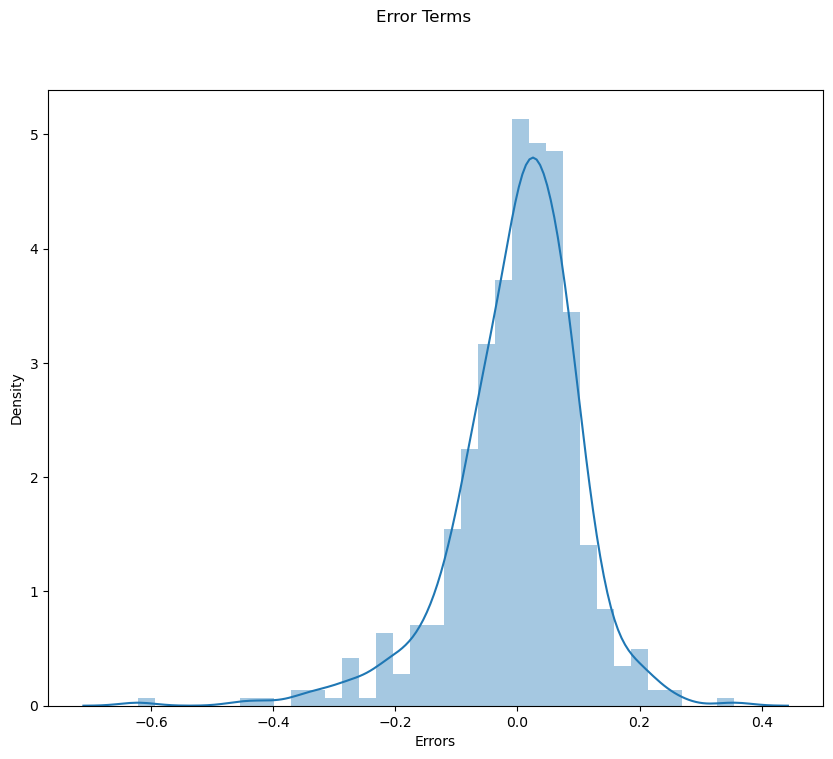

In [315]:
fig = plt.figure(figsize=(10,8))
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', )                   
plt.xlabel('Errors', )                        

## Step 8 - making predictions on lr_6 model

In [316]:
# Apply scaler() to all the numeric columns.
test_var = ['temp', 'hum', 'windspeed', 'cnt']
df_bikes_test[test_var] = min_max_scaler_object.transform(df_bikes_test[test_var])

In [317]:
df_bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,summer,winter,Mist & Cloudy,clear,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.059361,0.086758,0.100457,...,0.264840,0.232877,0.319635,0.652968,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.236840,0.282125,0.301297,...,0.442259,0.423633,0.467403,0.477117,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [318]:
# Running lr_6 model on test dataset
y_test = df_bikes_test.pop('cnt')
X_test = df_bikes_test

In [319]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'spring', 'summer', 'winter',
       'Mist & Cloudy', 'clear', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [320]:
X_test_new = X_test[X_train_rfe.columns]
# Addind constant to X_test_new
X_test_new = sm.add_constant(X_test_new)

In [321]:
# predict on test data using lr_6 model
y_test_pred = lr_6.predict(X_test_new)


## Step 9 - Model evaluation
#### We will be evaluating the model using R-Square Score

In [322]:
print("R Square score on train data :",round(r2_score(y_train,y_train_pred),4))
print("R Square score on test data :",round(r2_score(y_test,y_test_pred),4))


R Square score on train data : 0.7886
R Square score on test data : 0.7794


Text(0, 0.5, 'y_test_pred')

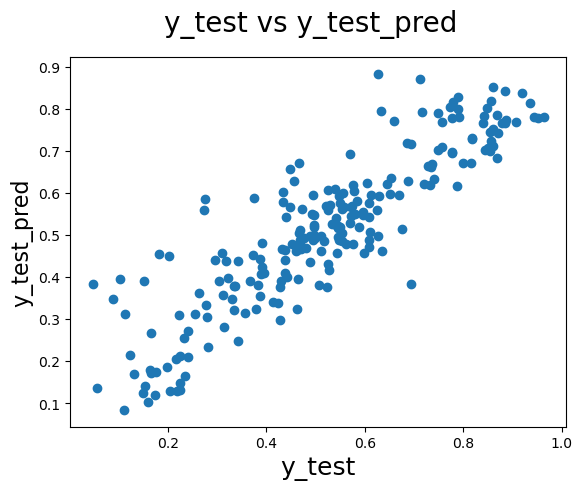

In [323]:
# Plotting y_test and y_test_pred to understand the spreat
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

# So the equation for our best fit line is 
**_cnt_** = 0.2429 + (0.2397× **_Year_**) − (0.0851× **_Holiday Indicator_**)+(0.4612 × **_Temperature_**)−(0.1687× **_Windspeed_**)−(0.0767 × **_July Indicator_**)+(0.0468 × **_September Indicator_**)−(0.1064 × **_Spring Indicator_**)+(0.0351 × **_Winter Indicator_**)−(0.0677 × **_Mist/Cloudy Indicator_**)


# Final conclusion
1. The top 3 features that are influencing the bike booking are `clear` , `Mist & Cloudy` and `yr` features
2. `clear` with the coefficient of 0.5117 which tells us the people are prefering clear wether while booking bikes
3. `Mist & Cloudy` with the coefficient of 0.4198 which tell us that people also prefer to book bikes in cloudy weather 	
4. `yr` with the coefficient of 0.2560 indicates that a unit increase in yr variable increases the bike hire numbers by 0.2303 units.